In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
data = pd.read_csv('housing.csv')

In [31]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

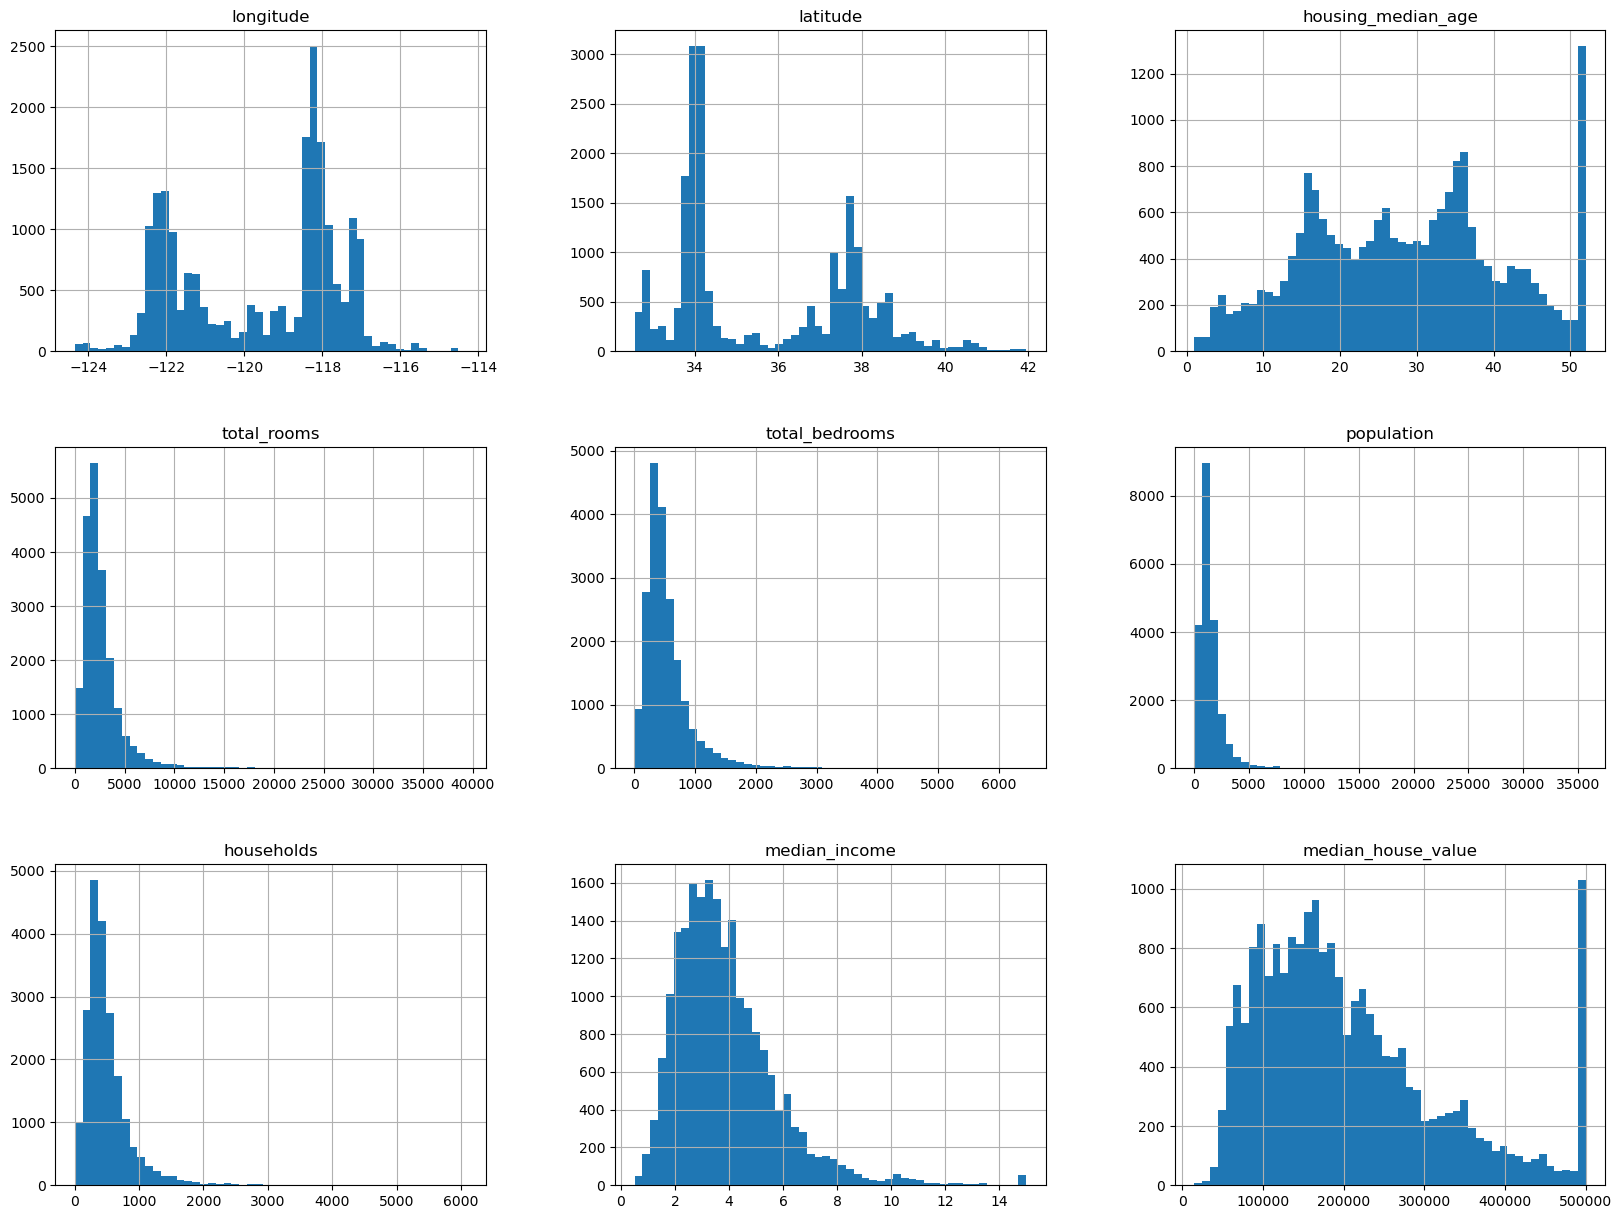

In [33]:
data.hist(bins=50,figsize=(20,15))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

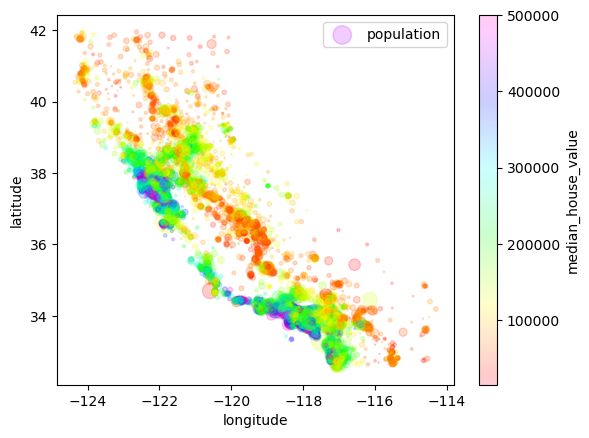

In [34]:
data.plot(kind="scatter", x="longitude", y="latitude", 
             alpha=0.2, s=data["population"]/100, label="population",
            c="median_house_value", cmap=plt.get_cmap("gist_rainbow"))

In [35]:
corr_matrix = data.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

corr_matrix.style.background_gradient(cmap='coolwarm')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [36]:
data_na=data.dropna(subset=["total_bedrooms"])
data_na.shape

(20433, 10)

In [37]:
dummies=pd.get_dummies(data_na.ocean_proximity)
dummies.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [38]:
data_na_dummies = pd.concat([data_na, dummies], axis='columns')
data_na_dummies.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [39]:
data_clean = data_na_dummies.drop(['ocean_proximity', 'ISLAND'], axis='columns')
data_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


In [40]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [41]:
import scipy.stats as stats

median_income = data['median_income']
median_house_value = data['median_house_value']

correlation, p_value = stats.pearsonr(median_income, median_house_value)

confidence_level = 0.95
alpha = 1 - confidence_level
lower_bound, upper_bound = stats.norm.interval(confidence_level, loc=0, scale=1)
lower_ci = correlation + lower_bound * (1 - correlation)
upper_ci = correlation + upper_bound * (1 - correlation)

print("Correlation Coefficient:", correlation)
print("P-Value:", p_value)
print(f"{confidence_level*100}% Confidence Interval: ({lower_ci}, {upper_ci})")

Correlation Coefficient: 0.6880752079585416
P-Value: 0.0
95.0% Confidence Interval: (0.07671384967213701, 1.299436566244946)


In [55]:
import scipy.stats as stats
import pandas as pd

# Assuming you have a DataFrame called 'housing_data' that contains the relevant columns

# Define the attributes for correlation analysis
attributes = ['longitude','latitude','median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households']

# Create an empty list to store the results
results = []

# Perform correlation analysis for each attribute
for attribute in attributes:
    # Extract the attribute and median_house_value columns
    attribute_data = data_clean[attribute]
    median_house_value = data_clean['median_house_value']
    
    # Calculate correlation, p-value, and confidence interval
    correlation, p_value = stats.pearsonr(attribute_data, median_house_value)
    confidence_interval = stats.t.interval(0.95, len(data_clean)-2, loc=correlation, scale=stats.sem(attribute_data))
    lower_ci, upper_ci = confidence_interval
    
    # Append the results to the list
    results.append({
        'Attribute': attribute,
        'Correlation': correlation,
        'P-Value': p_value,
        'Lower CI': lower_ci,
        'Upper CI': upper_ci
    })

# Create a DataFrame from the results list
results_df = pd.DataFrame(results, columns=['Attribute', 'Correlation', 'P-Value', 'Lower CI', 'Upper CI'])

# Display the results as a table
print(results_df)

            Attribute  Correlation       P-Value   Lower CI   Upper CI
0           longitude    -0.045398  8.450466e-11  -0.072872  -0.017925
1            latitude    -0.144638  6.132893e-96  -0.173932  -0.115344
2       median_income     0.688355  0.000000e+00   0.662312   0.714399
3  housing_median_age     0.106432  1.496134e-52  -0.066230   0.279094
4         total_rooms     0.133294  1.221172e-81 -29.831602  30.098190
5      total_bedrooms     0.049686  1.191968e-12  -5.728438   5.827811
6          population    -0.025300  2.982633e-04 -15.564103  15.513504
7          households     0.064894  1.611514e-20  -5.177277   5.307064


In [56]:
results_df_sorted = results_df.sort_values(by='Correlation', ascending=False)
print(results_df_sorted)

            Attribute  Correlation       P-Value   Lower CI   Upper CI
2       median_income     0.688355  0.000000e+00   0.662312   0.714399
4         total_rooms     0.133294  1.221172e-81 -29.831602  30.098190
3  housing_median_age     0.106432  1.496134e-52  -0.066230   0.279094
7          households     0.064894  1.611514e-20  -5.177277   5.307064
5      total_bedrooms     0.049686  1.191968e-12  -5.728438   5.827811
6          population    -0.025300  2.982633e-04 -15.564103  15.513504
0           longitude    -0.045398  8.450466e-11  -0.072872  -0.017925
1            latitude    -0.144638  6.132893e-96  -0.173932  -0.115344


In [53]:
results_df.to_csv('correlation_results.csv', index=False)

In [58]:
import math

# Given information
interested_yesterday = 10
total_calls_yesterday = 50
total_calls_today = 100
confidence_level = 0.95

# Calculate the proportion of interested people
p = interested_yesterday / total_calls_yesterday

# Calculate the standard error
se = math.sqrt((p * (1 - p)) / total_calls_today)

# Calculate the margin of error (using the appropriate z-score for the confidence level)
z_score = abs(stats.norm.ppf((1 - confidence_level) / 2))
me = z_score * se

# Calculate the lower and upper bounds of the confidence interval
lower_bound = p - me
upper_bound = p + me

# Calculate the estimated number of interested people today
estimated_interested = p * total_calls_today

# Print the results
print(f"Estimated number of interested people today: {estimated_interested:.0f}")
print(f"95% Confidence Interval: {lower_bound * total_calls_today:.0f} to {upper_bound * total_calls_today:.0f}")


Estimated number of interested people today: 20
95% Confidence Interval: 12 to 28


In [64]:
X = data_clean.drop(['median_house_value'], axis='columns')
y = data_clean['median_house_value']

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=24)

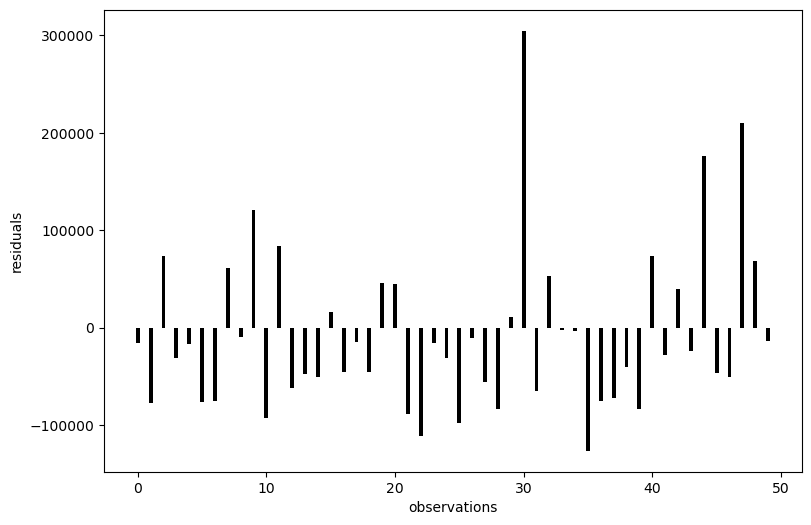

In [86]:
from sklearn.linear_model import LinearRegression 

OLS = LinearRegression()
OLS.fit(X_train, y_train)

y_pred=OLS.predict(X_test)

performance = pd.DataFrame({'ACTUAL VALUES':y_test, 'PREDICTIONS': y_pred})
performance['DIFFERENCE']=performance['ACTUAL VALUES']-performance['PREDICTIONS']

performance.reset_index(drop=True, inplace=True) #inplace turns into a column
performance.reset_index(inplace=True)

fig = plt.figure(figsize=(9,6))
plt.bar('index', 'DIFFERENCE', data=performance[:50], color='black', width=0.3)
plt.ylabel('residuals')
plt.xlabel('observations')
plt.show()

In [87]:
performance.head()

,index,ACTUAL VALUES,PREDICTIONS,DIFFERENCE
0,0,212500.0,227898.480694,-15398.480694
1,1,140100.0,217249.045967,-77149.045967
2,2,250000.0,176518.108938,73481.891062
3,3,108900.0,139694.586212,-30794.586212
4,4,57100.0,74030.524119,-16930.524119
